In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier,GradientBoostingRegressor
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, VotingClassifier
from sklearn.svm import SVC, SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error
from sklearn.metrics import roc_auc_score,roc_curve
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("C:\\Users\\adite\\OneDrive\\Documents\\diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Data Understanding

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df[df.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [7]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


## Data Visualization

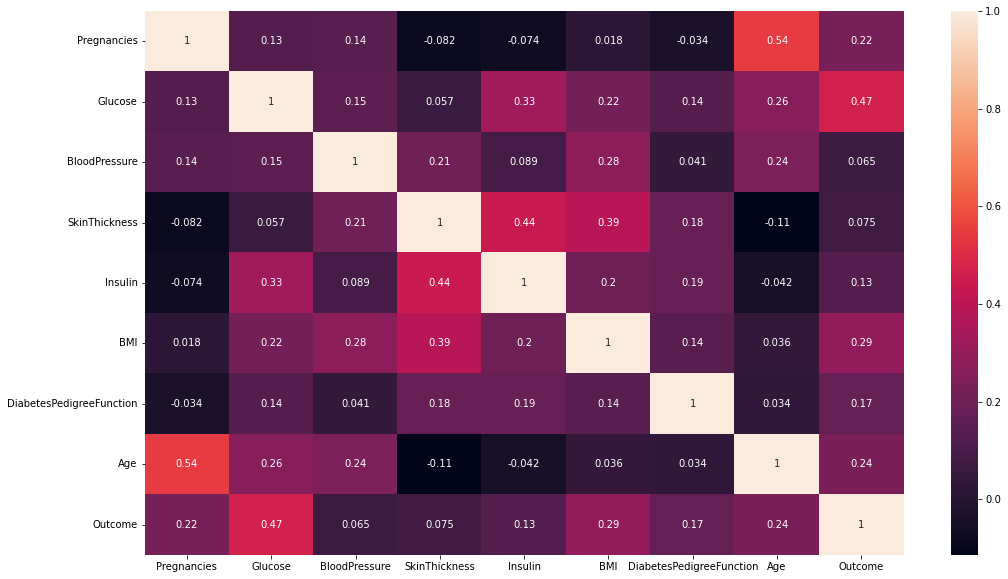

In [8]:
plt.figure(figsize=(17,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [9]:
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


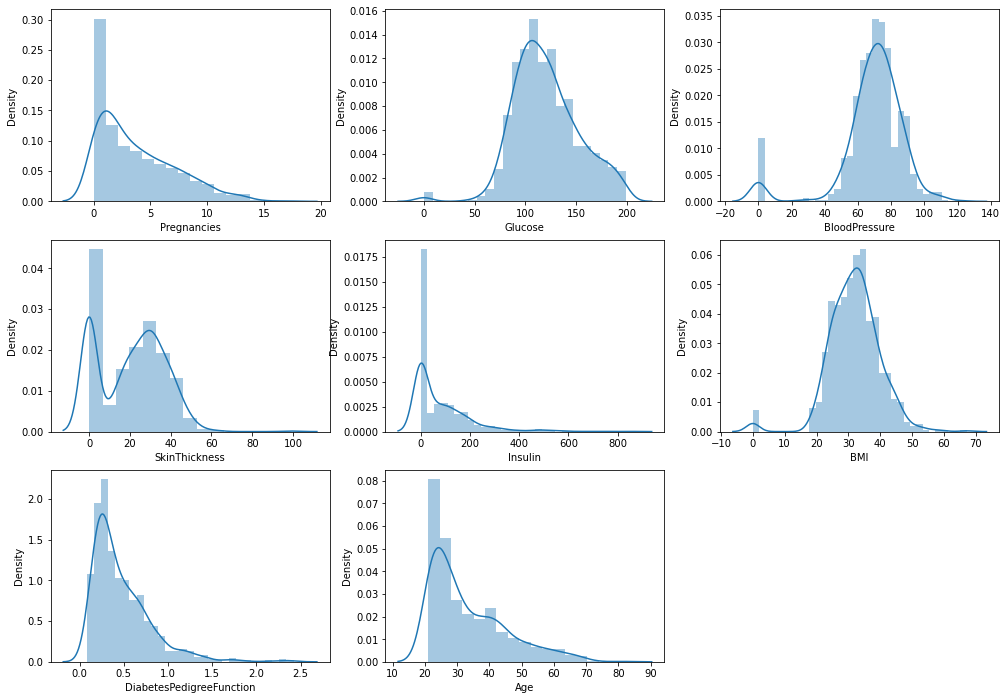

In [10]:
plt.figure(figsize=(17,12))
plt.subplot(3,3,1)
sns.distplot(df.Pregnancies)

plt.subplot(3,3,2)
sns.distplot(df.Glucose)

plt.subplot(3,3,3)
sns.distplot(df.BloodPressure)

plt.subplot(3,3,4)
sns.distplot(df["SkinThickness"])

plt.subplot(3,3,5)
sns.distplot(df.Insulin)

plt.subplot(3,3,6)
sns.distplot(df.BMI)

plt.subplot(3,3,7)
sns.distplot(df.DiabetesPedigreeFunction)

plt.subplot(3,3,8)
sns.distplot(df.Age)

In [11]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

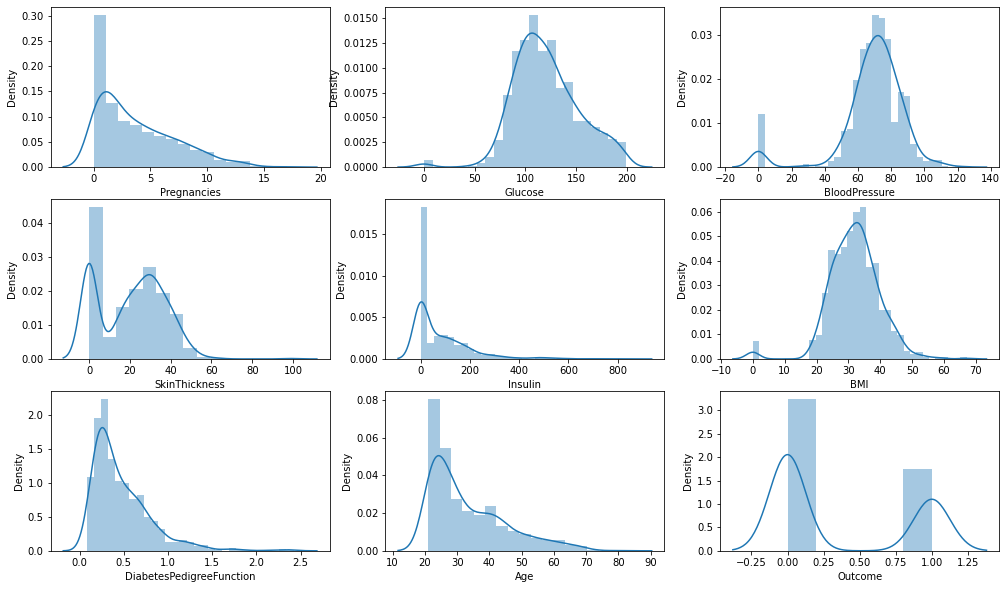

In [12]:
plt.figure(figsize=(17,10))
plots=1

for i in df.columns:
    if plots<=9:
        ax= plt.subplot(3,3,plots)
        sns.distplot(df[i])
        plt.xlabel(i, fontsize=10)
    plots=plots+1
plt.show()

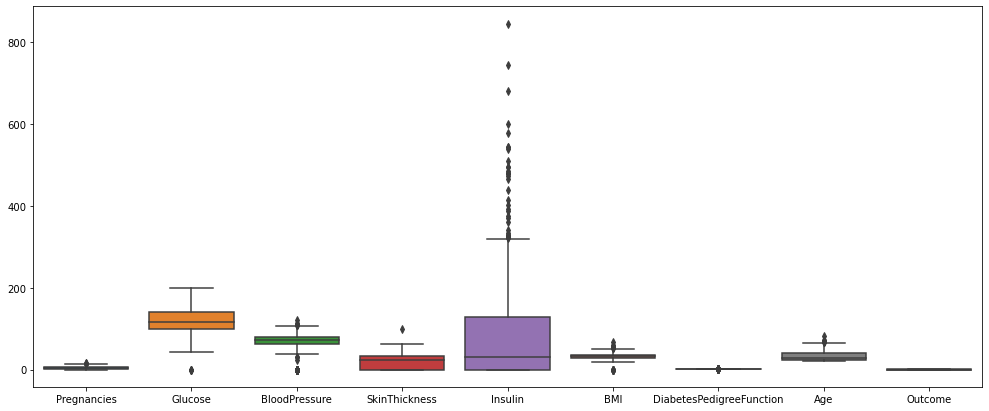

In [13]:
fig,ax=plt.subplots(figsize=(17,7))
sns.boxplot(data=df)

## Many Dataset columns are not normally distributed and also many of them are skewed

In [14]:
#df[df.Glucose==0]
#df[df.BloodPressure==0]
#df[df.SkinThickness==0]
#df[df.Insulin==0]
#df[df.BMI==0]

In [15]:
df.Glucose=df.Glucose.replace(0,df.Glucose.mean())
df.BloodPressure=df.BloodPressure.replace(0,df.BloodPressure.mean())
df.SkinThickness=df.SkinThickness.replace(0,df.SkinThickness.mean())
df.Insulin=df.Insulin.replace(0,df.Insulin.mean())
df.BMI=df.BMI.replace(0,df.BMI.mean())

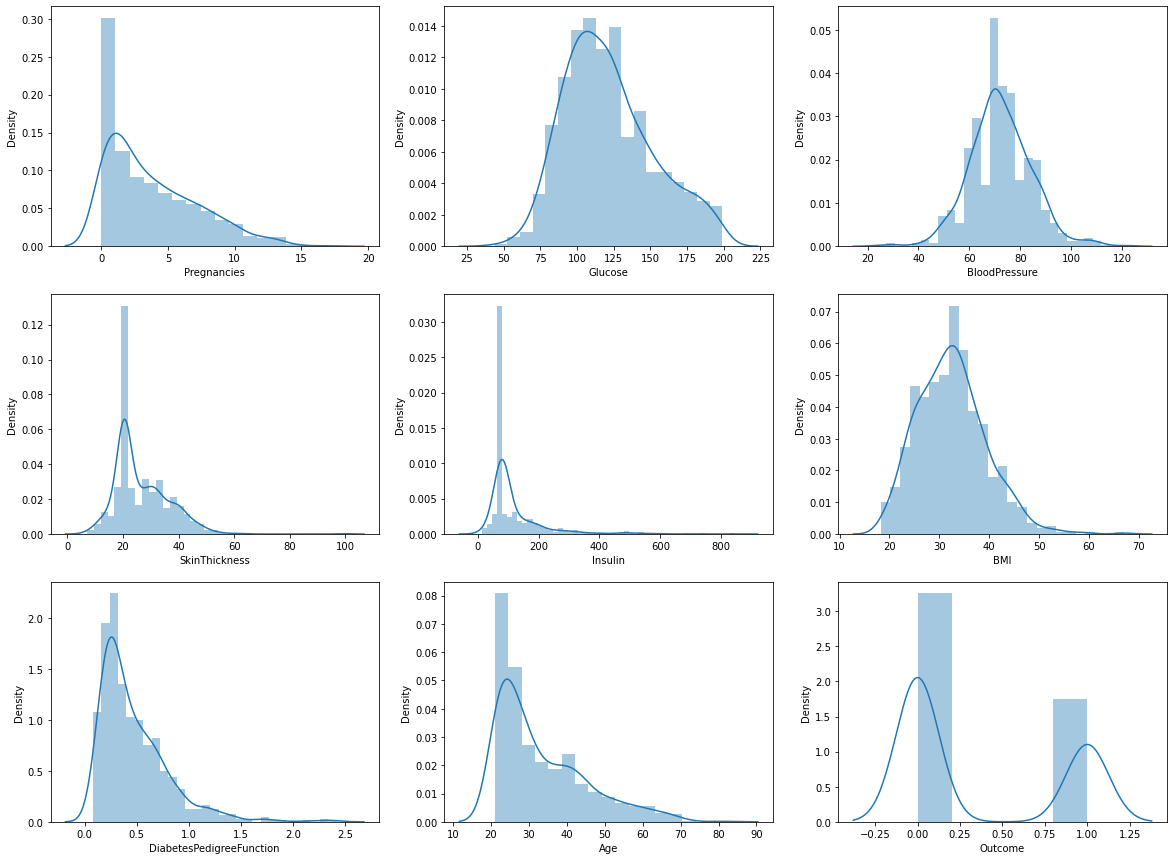

In [16]:
plt.figure(figsize=(20,15))
plot_no=1

for i in df.columns:
    if plot_no<=9:
        ax=plt.subplot(3,3,plot_no)
        sns.distplot(df[i])
    plot_no=plot_no+1
plt.show()

<Figure size 1224x504 with 0 Axes>

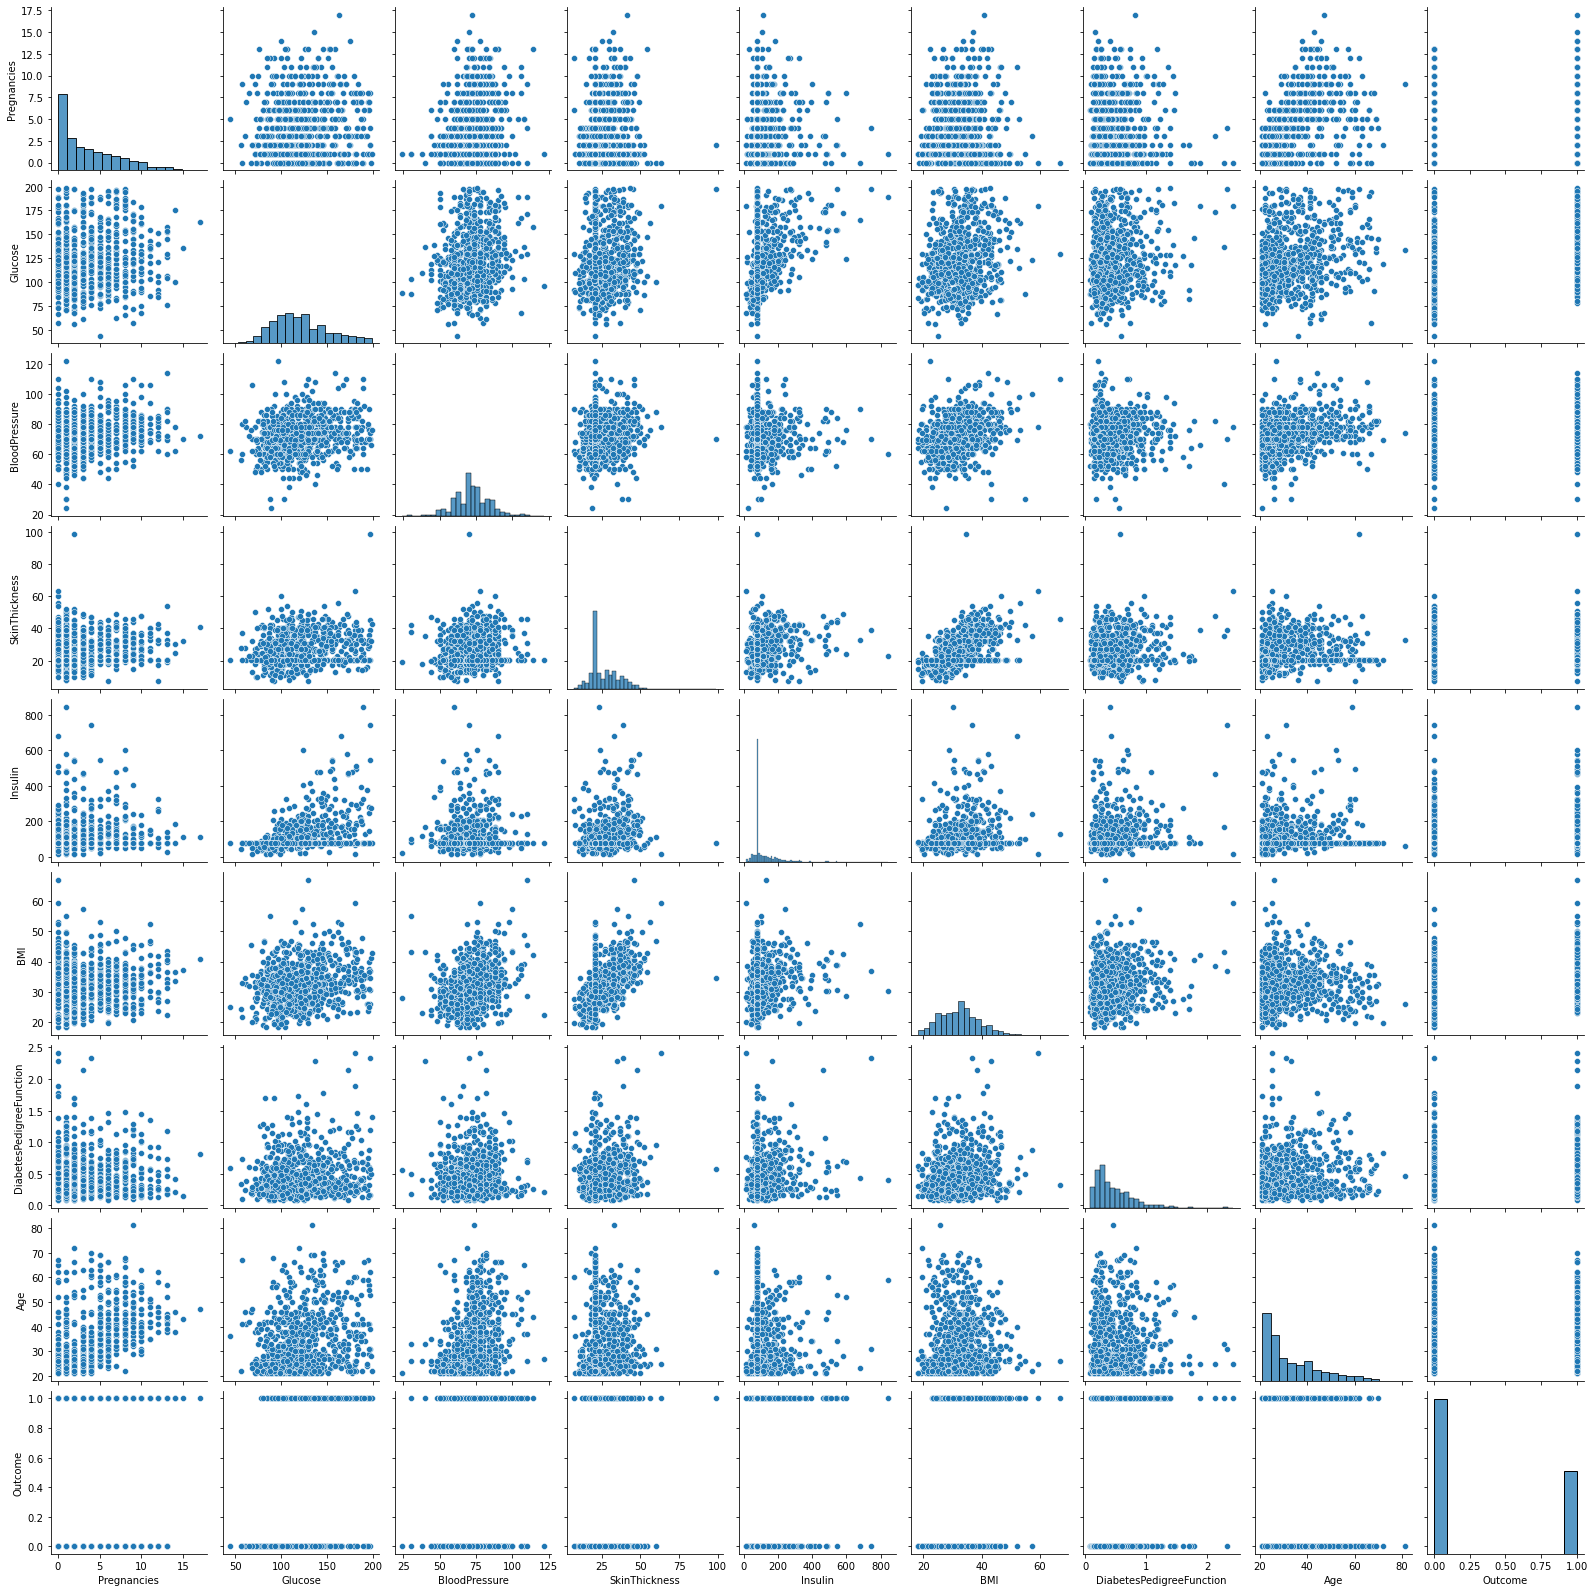

In [17]:
plt.figure(figsize=(17,7))
sns.pairplot(df)

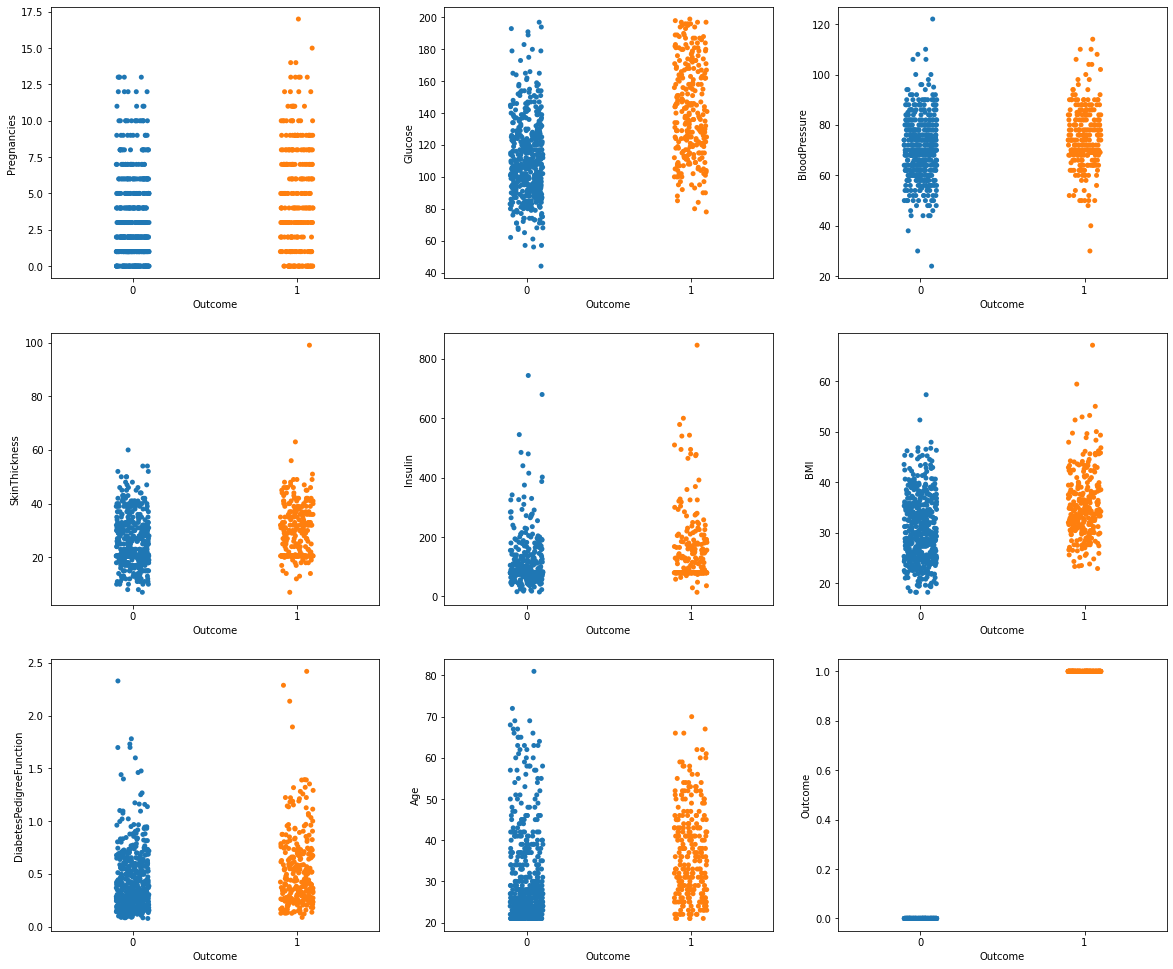

In [18]:
plt.figure(figsize=(20,17))
plot_with_target=1

for i in df.columns:
    if plot_with_target<=9:
        ax=plt.subplot(3,3,plot_with_target)
        sns.stripplot(df.Outcome,df[i],jitter=0.1)
    plot_with_target=plot_with_target+1
plt.show()

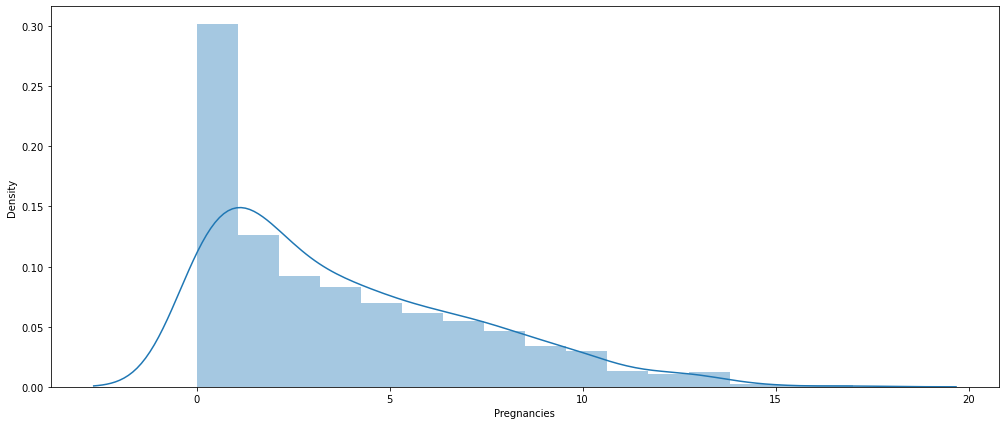

In [19]:
plt.figure(figsize=(17,7))
sns.distplot(df.Pregnancies)

In [20]:
q = df['Pregnancies'].quantile(0.98)
q

12.0

In [21]:
data_cleaned = df[df['Pregnancies']<q]
data_cleaned

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [22]:
df.Pregnancies.value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

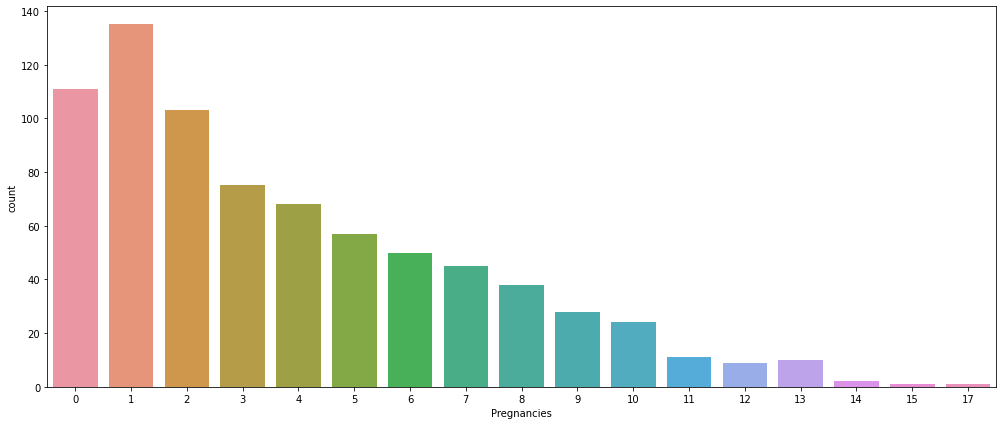

In [23]:
plt.figure(figsize=(17,7))
sns.countplot(df.Pregnancies,orient="h",)

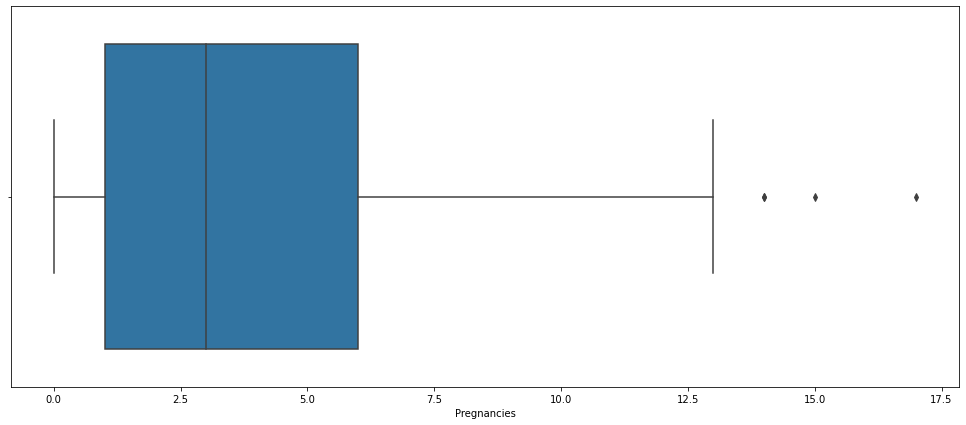

In [24]:
plt.figure(figsize=(17,7))
sns.boxplot(df.Pregnancies)

# Data Preprocessing

In [25]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [26]:
X=df.drop(["Outcome"],axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33


In [27]:
y=df[["Outcome"]]
y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


### Balance the inbalance data

In [28]:
smote=SMOTE()
balanced_X,balanced_y=smote.fit_resample(X,y)
balanced_X.shape,balanced_y.shape

((1000, 8), (1000, 1))

### Feature Engineering: PCA

In [29]:
pca=PCA()
pca_df=pca.fit_transform(balanced_X)
pca_df

array([[-4.19346529e+01,  2.86785536e+01,  6.74652831e+00, ...,
         2.43081395e+00, -7.99301265e-01,  8.66574772e-02],
       [-5.04872152e+01, -3.62806709e+01, -1.02616412e+00, ...,
         4.99191687e+00, -2.57378442e+00, -8.82782977e-02],
       [-3.80735577e+01,  5.90731796e+01, -1.94520420e+01, ...,
         6.81546482e+00,  4.38510884e+00,  2.25341351e-01],
       ...,
       [ 1.25376116e+02, -1.56263675e+01, -5.46064123e+00, ...,
        -2.72409054e+00, -1.58967326e+00, -1.59765868e-01],
       [ 1.33015451e+02, -4.06246308e+00, -4.35147693e+00, ...,
        -2.19675737e+00,  1.21564569e+00, -1.40028829e-01],
       [-3.65123436e+01,  7.42528712e+01,  1.03561756e+01, ...,
         3.97259878e+00, -2.63286885e+00, -3.01954871e-01]])

In [30]:
variance=pca.explained_variance_ratio_
variance

array([8.89727961e-01, 7.62339051e-02, 1.46859520e-02, 9.76913184e-03,
       6.72731062e-03, 2.15243079e-03, 6.94102375e-04, 9.20629288e-06])

In [31]:
percentage=np.cumsum((variance*100))
percentage

array([ 88.9727961 ,  96.59618661,  98.06478181,  99.04169499,
        99.71442605,  99.92966913,  99.99907937, 100.        ])

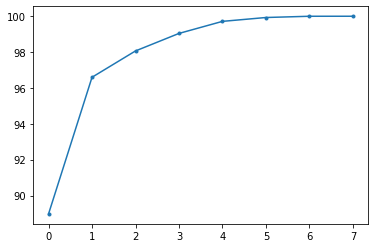

In [32]:
plt.plot(percentage,marker=".")

In [33]:
final_pca_df=pd.DataFrame({"Pregnancies":pca_df[:,0],"Glucose":pca_df[:,1],"BloodPressure":pca_df[:,2],
                      "SkinThickness":pca_df[:,3],"Insulin":pca_df[:,4],"Outcome":balanced_y.Outcome})

final_pca_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,Outcome
0,-41.934653,28.678554,6.746528,-3.555233,14.160637,1
1,-50.487215,-36.280671,-1.026164,-0.446103,3.991619,0
2,-38.073558,59.073180,-19.452042,-9.306111,-0.938520,1
3,-36.116943,-35.421737,-8.513150,1.748008,-4.681453,0
4,44.024100,1.180041,-23.932590,-0.737928,24.160154,1


In [34]:
final_pca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    1000 non-null   float64
 1   Glucose        1000 non-null   float64
 2   BloodPressure  1000 non-null   float64
 3   SkinThickness  1000 non-null   float64
 4   Insulin        1000 non-null   float64
 5   Outcome        1000 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 47.0 KB


In [35]:
final_pca_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,Outcome
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1000.00000
mean,-4.106937e-15,3.268497e-15,-1.024958e-15,6.039613e-17,1.115996e-15,0.50000
std,9.908259e+01,2.900299e+01,1.272975e+01,1.038237e+01,8.615678e+00,0.50025
min,-1.174889e+02,-7.638113e+01,-4.064122e+01,-3.472035e+01,-3.694120e+01,0.00000
25%,-4.768704e+01,-2.151102e+01,-9.574966e+00,-6.593165e+00,-4.967969e+00,0.00000
50%,-4.186820e+01,-4.703636e+00,-9.174669e-01,-5.179999e-01,-1.797230e-01,0.50000
75%,1.633786e+01,1.865329e+01,9.005696e+00,6.295113e+00,4.879002e+00,1.00000
max,7.224648e+02,7.900401e+01,5.089907e+01,4.244249e+01,5.988650e+01,1.00000


In [36]:
final_pca_df[final_pca_df.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,Outcome


In [37]:
final_x=final_pca_df.drop({"Outcome"},axis=1)
final_x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin
0,-41.934653,28.678554,6.746528,-3.555233,14.160637
1,-50.487215,-36.280671,-1.026164,-0.446103,3.991619
2,-38.073558,59.073180,-19.452042,-9.306111,-0.938520
3,-36.116943,-35.421737,-8.513150,1.748008,-4.681453
4,44.024100,1.180041,-23.932590,-0.737928,24.160154


In [38]:
final_y=final_pca_df[["Outcome"]]
final_y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


### Data Standardization

In [39]:
scaler=StandardScaler()
scaled_X=scaler.fit_transform(final_x)
scaled_y=scaler.fit_transform(final_y)

## Splittimg the data into train test data

In [40]:
X_train,X_test,y_train,y_test=train_test_split(scaled_X,scaled_y,test_size=0.3,random_state=12)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((700, 5), (300, 5), (700, 1), (300, 1))

# Linear Regression

### Trained training model

In [41]:
Logi_model=LogisticRegression()
Logi_model.fit(X_train,y_train)

LogisticRegression()

In [42]:
logi_predicted=Logi_model.predict(X_train)
logi_predicted

array([ 1.,  1.,  1.,  1., -1., -1.,  1.,  1., -1.,  1.,  1., -1.,  1.,
        1.,  1.,  1., -1., -1., -1.,  1.,  1.,  1., -1., -1., -1.,  1.,
       -1., -1., -1.,  1., -1., -1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,
        1.,  1., -1., -1., -1., -1.,  1.,  1., -1., -1.,  1., -1., -1.,
        1., -1., -1.,  1., -1., -1.,  1.,  1., -1.,  1.,  1.,  1., -1.,
        1., -1.,  1., -1., -1.,  1.,  1.,  1., -1., -1., -1., -1., -1.,
       -1., -1.,  1., -1., -1., -1., -1., -1.,  1.,  1., -1.,  1., -1.,
       -1., -1., -1., -1., -1.,  1., -1.,  1.,  1., -1., -1.,  1.,  1.,
        1., -1., -1.,  1.,  1., -1.,  1.,  1., -1.,  1., -1., -1., -1.,
        1.,  1., -1., -1.,  1., -1.,  1., -1.,  1., -1., -1., -1.,  1.,
        1., -1., -1., -1.,  1.,  1.,  1., -1.,  1.,  1., -1.,  1., -1.,
        1.,  1.,  1., -1.,  1., -1.,  1., -1.,  1., -1.,  1.,  1., -1.,
        1.,  1.,  1.,  1., -1., -1., -1.,  1., -1.,  1., -1., -1.,  1.,
       -1.,  1.,  1., -1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1

In [43]:
logi__train_accuracy_score=(accuracy_score(y_train,logi_predicted))*100
logi__train_accuracy_score

72.28571428571429

In [44]:
logi_con_metrix=confusion_matrix(y_train,logi_predicted)
logi_con_metrix

array([[273,  85],
       [109, 233]], dtype=int64)

In [45]:
print(classification_report(y_train,logi_predicted))

              precision    recall  f1-score   support

        -1.0       0.71      0.76      0.74       358
         1.0       0.73      0.68      0.71       342

    accuracy                           0.72       700
   macro avg       0.72      0.72      0.72       700
weighted avg       0.72      0.72      0.72       700



### Logistic Model testing

In [46]:
logi_test_prediction=Logi_model.predict(X_test)
logi_test_prediction

array([-1.,  1., -1., -1.,  1.,  1., -1.,  1., -1., -1., -1., -1., -1.,
        1., -1.,  1., -1.,  1.,  1., -1., -1.,  1., -1., -1., -1., -1.,
       -1., -1.,  1.,  1., -1.,  1., -1., -1., -1.,  1., -1.,  1.,  1.,
        1.,  1.,  1., -1.,  1., -1., -1.,  1., -1., -1.,  1., -1., -1.,
       -1., -1.,  1., -1., -1.,  1., -1.,  1.,  1., -1., -1.,  1.,  1.,
       -1., -1., -1., -1., -1.,  1., -1.,  1.,  1.,  1.,  1.,  1., -1.,
        1., -1., -1.,  1.,  1., -1.,  1., -1., -1.,  1., -1.,  1.,  1.,
        1.,  1., -1.,  1., -1., -1., -1., -1., -1., -1.,  1., -1., -1.,
       -1.,  1., -1.,  1.,  1., -1., -1.,  1.,  1.,  1., -1., -1.,  1.,
       -1., -1.,  1.,  1., -1.,  1.,  1.,  1.,  1., -1., -1., -1., -1.,
       -1., -1., -1.,  1., -1.,  1., -1., -1., -1., -1., -1., -1.,  1.,
       -1., -1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1.,
       -1.,  1.,  1.,  1., -1.,  1., -1.,  1.,  1., -1.,  1., -1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1., -1

In [47]:
logi_test_accuracy=accuracy_score(y_test,logi_test_prediction)*100
logi_test_accuracy

71.66666666666667

In [48]:
logi_test_confusio_metrix=confusion_matrix(y_test,logi_test_prediction)
logi_test_confusio_metrix

array([[106,  36],
       [ 49, 109]], dtype=int64)

In [49]:
logi_test_classification_report=classification_report(y_test,logi_test_prediction)
print(logi_test_classification_report)

              precision    recall  f1-score   support

        -1.0       0.68      0.75      0.71       142
         1.0       0.75      0.69      0.72       158

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



In [50]:
def MAPE(actual,predicted):
    return np.mean((np.abs(actual-predicted)/actual))*100

In [51]:
Logi_test_RMSE=np.sqrt(mean_squared_error(y_test,logi_test_prediction))
Logi_test_RMSE

1.0645812948447542

In [52]:
Logi_test_MAPE=MAPE(y_test,logi_test_prediction)
Logi_test_MAPE

8.666666666666668

## Using Cross validation method

In [53]:
#Train
kfold=KFold(n_splits=5)
logi_kfold_result=cross_val_score(Logi_model,scaled_X,scaled_y,cv=kfold)
logi_kfold_result=logi_kfold_result.mean()*100
logi_kfold_result                           

68.89999999999999

# Random Forest

In [54]:
RF_model=RandomForestClassifier(n_estimators=100)
RF_model.fit(X_train,y_train)

RandomForestClassifier()

In [55]:
#training
rf_train_prediction=RF_model.predict(X_train)
rf_train_accuracy_score=accuracy_score(y_train,rf_train_prediction)
rf_train_accuracy_score=rf_train_accuracy_score*100
print("accuracy train score is :",rf_train_accuracy_score)
print("*"*50)
print("Confusion metrix is :")
rf_train_cm=confusion_matrix(y_train,rf_train_prediction)
print(rf_train_cm)
print("*"*50)
print("classification report is :")
rf_train_CR=classification_report(y_train,rf_train_prediction)
print(rf_train_CR)

accuracy train score is : 100.0
**************************************************
Confusion metrix is :
[[358   0]
 [  0 342]]
**************************************************
classification report is :
              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00       358
         1.0       1.00      1.00      1.00       342

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700



In [56]:
# Testing 
rf_test_prediction=RF_model.predict(X_test)
rf_test_accuracy_score=accuracy_score(y_test,rf_test_prediction)
rf_test_accuracy_score=rf_test_accuracy_score*100
print("accuracy test score is :",rf_test_accuracy_score)
print("*"*50)
print("Confusion metrix is :")
rf_test_cm=confusion_matrix(y_test,rf_test_prediction)
print(rf_test_cm)
print("*"*50)
print("classification report is :")
rf_test_CR=classification_report(y_test,rf_test_prediction)
print(rf_test_CR)

accuracy test score is : 76.66666666666667
**************************************************
Confusion metrix is :
[[111  31]
 [ 39 119]]
**************************************************
classification report is :
              precision    recall  f1-score   support

        -1.0       0.74      0.78      0.76       142
         1.0       0.79      0.75      0.77       158

    accuracy                           0.77       300
   macro avg       0.77      0.77      0.77       300
weighted avg       0.77      0.77      0.77       300



In [57]:
rf_test_RMSE=np.sqrt(mean_squared_error(y_test,rf_test_prediction))
rf_test_RMSE

0.9660917830792959

In [58]:
rf_test_MAPE=MAPE(y_test,rf_test_prediction)
rf_test_MAPE

5.333333333333334

In [59]:
kfold=KFold(n_splits=5)
rf_cross_val_score=cross_val_score(RF_model,scaled_X,scaled_y,cv=kfold)
rf_cross_val_score=rf_cross_val_score.mean()*100
rf_cross_val_score

76.19999999999999

## Decision Tree

In [60]:
DT_model=DecisionTreeClassifier()
DT_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [61]:
DT_train_prediction=DT_model.predict(X_train)
DT_train_ac=accuracy_score(y_train,DT_train_prediction)
DT_train_ac=DT_train_ac*100
print("Accuracy score of DT model is :",DT_train_ac)
print("*"*50)
print("confusion matrix is :")
DT_train_cm=confusion_matrix(y_train,DT_train_prediction)
print(DT_train_cm)
print("*"*50)
DT_train_CR=classification_report(y_train,DT_train_prediction)
print(DT_train_CR)

Accuracy score of DT model is : 100.0
**************************************************
confusion matrix is :
[[358   0]
 [  0 342]]
**************************************************
              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00       358
         1.0       1.00      1.00      1.00       342

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700



In [62]:
DT_test_prediction=DT_model.predict(X_test)
DT_test_ac=accuracy_score(y_test,DT_test_prediction)
DT_test_ac=DT_test_ac*100
print("Accuracy score of DT model is :",DT_test_ac)
print("*"*50)
print("confusion matrix is :")
DT_test_cm=confusion_matrix(y_test,DT_test_prediction)
print(DT_test_cm)
print("*"*50)
DT_test_CR=classification_report(y_test,DT_test_prediction)
print(DT_test_CR)

Accuracy score of DT model is : 69.33333333333334
**************************************************
confusion matrix is :
[[ 97  45]
 [ 47 111]]
**************************************************
              precision    recall  f1-score   support

        -1.0       0.67      0.68      0.68       142
         1.0       0.71      0.70      0.71       158

    accuracy                           0.69       300
   macro avg       0.69      0.69      0.69       300
weighted avg       0.69      0.69      0.69       300



In [63]:
DT_test_RMSE=np.sqrt(mean_squared_error(y_test,DT_test_prediction))
DT_test_RMSE

1.1075498483890767

In [64]:
DT_test_MAPE=MAPE(y_test,DT_test_prediction)
DT_test_MAPE

1.3333333333333335

In [65]:
DT_Kfold_result=cross_val_score(DT_model,scaled_X,scaled_y,cv=kfold)
DT_Kfold_result=DT_Kfold_result.mean()*100
DT_Kfold_result

68.5

## Naive bayes

In [66]:
NB_model=GaussianNB()
NB_model.fit(X_train,y_train)

GaussianNB()

In [67]:
NB_train_prediction=NB_model.predict(X_train)
NB_train_ac=accuracy_score(y_train,NB_train_prediction)
NB_train_ac=NB_train_ac*100
NB_train_ac

70.42857142857143

In [68]:
NB_test_prediction=NB_model.predict(X_test)
NB_test_ac=accuracy_score(y_test,NB_test_prediction)
NB_test_ac=NB_test_ac*100
NB_test_ac

71.66666666666667

In [69]:
NB_test_RMSE=np.sqrt(mean_squared_error(y_test,NB_test_prediction))
NB_test_RMSE

1.0645812948447542

In [70]:
NB_test_MAPE=MAPE(y_test,NB_test_prediction)
NB_test_MAPE

30.0

In [71]:
NB_Kfold_result=cross_val_score(NB_model,scaled_X,scaled_y,cv=kfold)
NB_Kfold_result=NB_Kfold_result.mean()*100
NB_Kfold_result

67.6

## KNN Algorithm

In [72]:
KNN_model=KNeighborsClassifier(n_neighbors=10)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [73]:
KNN_train_prediction=KNN_model.predict(X_train)
KNN_train_ac=accuracy_score(y_train,KNN_train_prediction)
KNN_train_ac=KNN_train_ac*100
KNN_train_ac

79.0

In [74]:
KNN_test_prediction=KNN_model.predict(X_test)
KNN_test_ac=accuracy_score(y_test,KNN_test_prediction)
KNN_test_ac=KNN_test_ac*100
KNN_test_ac

75.33333333333333

In [75]:
KNN_test_RMSE=np.sqrt(mean_squared_error(y_test,KNN_test_prediction))
KNN_test_RMSE

0.993310961716756

In [76]:
KNN_test_MAPE=MAPE(y_test,KNN_test_prediction)
KNN_test_MAPE

0.0

In [77]:
KNN_kfold_result=cross_val_score(KNN_model, scaled_X,scaled_y,cv=kfold)
KNN_kfold_result=KNN_kfold_result.mean()*100
KNN_kfold_result

72.1

## SVM

In [78]:
from sklearn.model_selection import GridSearchCV

classifier=GridSearchCV(SVC(gamma="auto"), {"C":[0.5,1,1.5,2],"kernel":["rbf","linear","poly"]},
                       cv=5,return_train_score=False)
classifier.fit(scaled_X,scaled_y)
results=classifier.cv_results_

In [79]:
results

{'mean_fit_time': array([0.01948037, 0.0196558 , 0.01686277, 0.01596627, 0.01887918,
        0.01705561, 0.0236568 , 0.01820621, 0.02058458, 0.02455416,
        0.02794781, 0.02084579]),
 'std_fit_time': array([0.00407626, 0.00700026, 0.00862251, 0.00258365, 0.00618802,
        0.00818615, 0.01192497, 0.00351673, 0.00841102, 0.00582277,
        0.00799595, 0.01017748]),
 'mean_score_time': array([0.01929517, 0.00145655, 0.00825434, 0.01228719, 0.00212374,
        0.0032156 , 0.00996284, 0.0046267 , 0.00186763, 0.01107311,
        0.00455842, 0.00064745]),
 'std_score_time': array([0.00871386, 0.00151897, 0.00704481, 0.00511464, 0.00424747,
        0.0064312 , 0.00815237, 0.00622078, 0.00373526, 0.00529442,
        0.00230416, 0.0012949 ]),
 'param_C': masked_array(data=[0.5, 0.5, 0.5, 1, 1, 1, 1.5, 1.5, 1.5, 2, 2, 2],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_value='?',
             dtype=ob

In [80]:
classifier.best_score_

0.783

In [81]:
classifier.best_estimator_

SVC(C=1.5, gamma='auto')

In [82]:
df1=pd.DataFrame(classifier.cv_results_)
df1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.019480,0.004076,0.019295,0.008714,0.5,rbf,"{'C': 0.5, 'kernel': 'rbf'}",0.740,0.720,0.775,0.815,0.800,0.770,0.035637,4
1,0.019656,0.007000,0.001457,0.001519,0.5,linear,"{'C': 0.5, 'kernel': 'linear'}",0.695,0.680,0.760,0.735,0.735,0.721,0.029223,9
2,0.016863,0.008623,0.008254,0.007045,0.5,poly,"{'C': 0.5, 'kernel': 'poly'}",0.715,0.680,0.775,0.750,0.735,0.731,0.032156,7
3,0.015966,0.002584,0.012287,0.005115,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.755,0.725,0.795,0.815,0.815,0.781,0.035553,3
4,0.018879,0.006188,0.002124,0.004247,1,linear,"{'C': 1, 'kernel': 'linear'}",0.695,0.675,0.760,0.735,0.735,0.720,0.030659,10
5,0.017056,0.008186,0.003216,0.006431,1,poly,"{'C': 1, 'kernel': 'poly'}",0.710,0.680,0.770,0.755,0.735,0.730,0.032094,8
6,0.023657,0.011925,0.009963,0.008152,1.5,rbf,"{'C': 1.5, 'kernel': 'rbf'}",0.760,0.740,0.795,0.810,0.810,0.783,0.028213,1
7,0.018206,0.003517,0.004627,0.006221,1.5,linear,"{'C': 1.5, 'kernel': 'linear'}",0.695,0.675,0.760,0.735,0.735,0.720,0.030659,10
8,0.020585,0.008411,0.001868,0.003735,1.5,poly,"{'C': 1.5, 'kernel': 'poly'}",0.710,0.720,0.750,0.770,0.730,0.736,0.021541,6
9,0.024554,0.005823,0.011073,0.005294,2,rbf,"{'C': 2, 'kernel': 'rbf'}",0.755,0.745,0.795,0.810,0.805,0.782,0.026758,2


In [83]:
df1[["param_C","params","mean_test_score"]]

,param_C,params,mean_test_score
0,0.5,"{'C': 0.5, 'kernel': 'rbf'}",0.770
1,0.5,"{'C': 0.5, 'kernel': 'linear'}",0.721
2,0.5,"{'C': 0.5, 'kernel': 'poly'}",0.731
3,1,"{'C': 1, 'kernel': 'rbf'}",0.781
4,1,"{'C': 1, 'kernel': 'linear'}",0.720
5,1,"{'C': 1, 'kernel': 'poly'}",0.730
6,1.5,"{'C': 1.5, 'kernel': 'rbf'}",0.783
7,1.5,"{'C': 1.5, 'kernel': 'linear'}",0.720
8,1.5,"{'C': 1.5, 'kernel': 'poly'}",0.736
9,2,"{'C': 2, 'kernel': 'rbf'}",0.782


In [84]:
SVM_model=SVC(kernel="poly",C=1.7)
SVM_model.fit(X_train,y_train)

SVC(C=1.7, kernel='poly')

In [85]:
SVM_train_prediction=SVM_model.predict(X_train)
SVM_train_ac=accuracy_score(y_train,SVM_train_prediction)
SVM_train_ac=SVM_train_ac*100
SVM_train_ac

77.85714285714286

In [86]:
SVM_test_prediction=SVM_model.predict(X_test)
SVM_test_ac=accuracy_score(y_test,SVM_test_prediction)
SVM_test_ac=SVM_test_ac*100
SVM_test_ac

74.0

In [87]:
SVM_test_RMSE=np.sqrt(mean_squared_error(y_test,SVM_test_prediction))
SVM_test_RMSE

1.019803902718557

In [88]:
SVM_test_MAPE=MAPE(y_test,SVM_test_prediction)
SVM_test_MAPE

4.0

In [89]:
SVM_Kfold_result=cross_val_score(SVM_model,scaled_X,scaled_y,cv=kfold)
SVM_Kfold_result=SVM_Kfold_result.mean()*100
SVM_Kfold_result

64.7

## Adaboost algorithm

In [90]:
Ada_boost_model=AdaBoostClassifier(n_estimators=5)
Ada_boost_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=5)

In [91]:
Ada_boost_train_prediction=Ada_boost_model.predict(X_train)
Ada_boost_train_ac=accuracy_score(y_train,Ada_boost_train_prediction)
Ada_boost_train_ac=Ada_boost_train_ac*100
Ada_boost_train_ac

75.28571428571429

In [92]:
Ada_boost_test_prediction=Ada_boost_model.predict(X_test)
Ada_boost_test_ac=accuracy_score(y_test,Ada_boost_test_prediction)
Ada_boost_test_ac=Ada_boost_test_ac*100
Ada_boost_test_ac

75.33333333333333

In [93]:
Ada_boost_test_RMSE=np.sqrt(mean_squared_error(y_test,Ada_boost_test_prediction))
Ada_boost_test_RMSE

0.993310961716756

In [94]:
Ada_boost_test_MAPE=MAPE(y_test,Ada_boost_test_prediction)
Ada_boost_test_MAPE

-5.333333333333334

In [95]:
Ada_boost_kfold_result=cross_val_score(Ada_boost_model,scaled_X,scaled_y,cv=kfold)
Ada_boost_kfold_result=Ada_boost_kfold_result.mean()*100
Ada_boost_kfold_result

71.50000000000001

## Bagging classifier

In [96]:
Bagging_model=BaggingClassifier(n_estimators=10,random_state=12)
Bagging_model.fit(X_train,y_train)

BaggingClassifier(random_state=12)

In [97]:
Bagging_train_prediction=Bagging_model.predict(X_train)
Bagging_train_ac=accuracy_score(y_train,Bagging_train_prediction)
Bagging_train_ac=Bagging_train_ac*100
Bagging_train_ac

98.14285714285714

In [98]:
Bagging_test_prediction=Bagging_model.predict(X_test)
Bagging_test_ac=accuracy_score(y_test,Bagging_test_prediction)
Bagging_test_ac=Bagging_test_ac*100
Bagging_test_ac

71.66666666666667

In [99]:
Bagging_test_RMSE=np.sqrt(mean_squared_error(y_test,Bagging_test_prediction))
Bagging_test_RMSE

1.0645812948447542

In [100]:
Bagging_test_MAPE=MAPE(y_test,Bagging_test_prediction)
Bagging_test_MAPE

11.333333333333332

In [101]:
Bagging_kfold_result=cross_val_score(Bagging_model,scaled_X,scaled_y,cv=kfold)
Bagging_kfold_result=Bagging_kfold_result.mean()*100
Bagging_kfold_result

74.2

## Votting classifier( Logistic, DT, SVM, KNN)

In [102]:
estimator=[]

model1=LogisticRegression()
estimator.append(("Logistic",model1))

model2=DecisionTreeClassifier()
estimator.append(("DT",model2))

model3=SVC(kernel="poly")
estimator.append(("SVM",model3))

model4=KNeighborsClassifier(n_neighbors=7)
estimator.append(("KNN",model4))
estimator

[('Logistic', LogisticRegression()),
 ('DT', DecisionTreeClassifier()),
 ('SVM', SVC(kernel='poly')),
 ('KNN', KNeighborsClassifier(n_neighbors=7))]

In [103]:
Votting_model=VotingClassifier(estimator)
Votting_model.fit(X_train,y_train)

VotingClassifier(estimators=[('Logistic', LogisticRegression()),
                             ('DT', DecisionTreeClassifier()),
                             ('SVM', SVC(kernel='poly')),
                             ('KNN', KNeighborsClassifier(n_neighbors=7))])

In [104]:
votting_train_prediction=Votting_model.predict(X_train)
votting_train_ac=accuracy_score(y_train,votting_train_prediction)
votting_train_ac=votting_train_ac*100
votting_train_ac

80.85714285714286

In [105]:
votting_test_prediction=Votting_model.predict(X_test)
votting_test_ac=accuracy_score(y_test,votting_test_prediction)
votting_test_ac=votting_test_ac*100
votting_test_ac

72.66666666666667

In [106]:
Votting_test_RMSE=np.sqrt(mean_squared_error(y_test,votting_test_prediction))
Votting_test_RMSE

1.0456258094238748

In [107]:
Votting_test_MAPE=MAPE(y_test,votting_test_prediction)
Votting_test_MAPE

17.333333333333336

In [108]:
votting_kfold_result=cross_val_score(Votting_model,scaled_X,scaled_y,cv=kfold)
votting_kfold_result=votting_kfold_result.mean()*100
votting_kfold_result

70.39999999999999

In [109]:
model_df=pd.DataFrame({"Models":["Logistic Model","Random Forest","Decision Tree","Naive Bayes","KNN model","SVM",
                                "AdaBoost Model","Bagging Model","Votting Model"],
                       "Train_accuracy(train-test-split)":[logi__train_accuracy_score,rf_train_accuracy_score,DT_train_ac,
                                                          NB_train_ac,KNN_train_ac,SVM_train_ac,Ada_boost_train_ac,
                                                          Bagging_train_ac,votting_train_ac],
                      "Test_accuracy(train-test-split)":[logi_test_accuracy,rf_test_accuracy_score,DT_test_ac,NB_test_ac,
                                                        KNN_test_ac,SVM_test_ac,Ada_boost_test_ac,Bagging_test_ac,
                                                        votting_test_ac],
                      "KFold accuracy":[logi_kfold_result,rf_cross_val_score,DT_Kfold_result,NB_Kfold_result,KNN_kfold_result,
                                       SVM_Kfold_result,Ada_boost_kfold_result,Bagging_kfold_result,votting_kfold_result],
                      "RMSE":[Logi_test_RMSE,rf_test_RMSE,DT_test_RMSE,NB_test_RMSE,KNN_test_RMSE,SVM_test_RMSE,
                             Ada_boost_test_RMSE,Bagging_test_RMSE,Votting_test_RMSE],
                      "MAPE":[Logi_test_MAPE,rf_test_MAPE,DT_test_MAPE,NB_test_MAPE,KNN_test_MAPE,SVM_test_MAPE,
                             Ada_boost_test_MAPE,Bagging_test_MAPE,Votting_test_MAPE]})
model_df

,Models,Train_accuracy(train-test-split),Test_accuracy(train-test-split),KFold accuracy,RMSE,MAPE
0,Logistic Model,72.285714,71.666667,68.9,1.064581,8.666667
1,Random Forest,100.000000,76.666667,76.2,0.966092,5.333333
2,Decision Tree,100.000000,69.333333,68.5,1.107550,1.333333
3,Naive Bayes,70.428571,71.666667,67.6,1.064581,30.000000
4,KNN model,79.000000,75.333333,72.1,0.993311,0.000000
5,SVM,77.857143,74.000000,64.7,1.019804,4.000000
6,AdaBoost Model,75.285714,75.333333,71.5,0.993311,-5.333333
7,Bagging Model,98.142857,71.666667,74.2,1.064581,11.333333
8,Votting Model,80.857143,72.666667,70.4,1.045626,17.333333


## Finalized model is SVM

In [110]:
fpr, tpr, thresholds = roc_curve(y_test,SVM_test_prediction)

In [111]:
auc = roc_auc_score(y_test,SVM_test_prediction)
auc

0.740328044214655

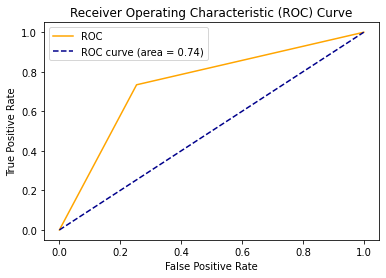

In [112]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [114]:
from pickle import dump
from pickle import load

# Model Saving

dump(SVM_model,open("ML_model.pkl","wb"))

# Load the model

loaded_model=load(open("ML_model.pkl","rb"))
result=loaded_model.score(scaled_X,scaled_y)
print(result)

0.767
